## Example of grid-search

In [61]:
import xgboost
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.xkcd()

In [62]:
errors_df = pd.read_csv("AbnormalQ.csv",delimiter=";")

In [63]:
y_df = errors_df['ABN_TOBIN_PANEL']
y_df = y_df.fillna(y_df.mean())

In [64]:
x_df = errors_df[['BOARD_GENDER_DIVERSITY_P',
       'BOARD_MEETING_ATTENDANCE', 'BOARD_MEMBER_AFFILIATION',
       'BOARD_MEMBER_COMPENSATIO', 'BOARD_SIZE', 'BOARD_SPECIFIC_SKILLS_PE',
       'CEO_BOARD_MEMBER', 'CHAIRMAN_IS_EX_CEO', 'EXECUTIVE_MEMBERS_GENDER',
       'INDEPENDENT_BOARD_MEMBER', 'NON_EXECUTIVE_BOARD_MEMB',
       'NUMBER_OF_BOARD_MEETINGS', 'STRICTLY_INDEPENDENT_BOA',
       'AVERAGE_BOARD_TENURE']]
x_df = x_df.fillna(x_df.mean())

In [65]:
dtrain = xgboost.DMatrix(x_df, label=y_df)

Let's lock the number of trees to 150. Also subsample = 0.8 and colsample_bytree = 0.8 usually work well enough.

In [66]:
b_rounds = 150
subsample = 0.8
colsample_bytree = 0.8

Scikit-learn has an easy-to-use function for grid-search.

In [67]:
from sklearn.model_selection import GridSearchCV

Let's create a dictionary of values that we want to try in our parameters. I' using list comprehension to create the value lists. Below is an example what kind of values are created for the gamma parameter.

In [68]:
[i/5.0 for i in range(0,11)]

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [69]:
param_values = {'learning_rate':[i/10.0 for i in range(1,5)],'max_depth':range(1,5,1),'gamma':[i/5.0 for i in range(0,5)],'min_child_weight':range(1,3,1)}

In [70]:
gsearch = GridSearchCV(estimator = xgboost.XGBRegressor(n_estimators = b_rounds, subsample = subsample, colsample_bytree = colsample_bytree,objective='reg:squarederror',seed = 12),
                        n_jobs = -1, param_grid = param_values, cv=5)

The following step will take a very long time, because the grid-search algorithm is calculating numerous boosting models.

In [71]:
gsearch.fit(x_df,y_df)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=150, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=12,
                                    subsample=0.8, tree_method=None,
      

In [72]:
gsearch.best_params_

{'gamma': 0.8, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1}

In [73]:
gsearch.best_score_

0.01604761893762985

In [74]:
b_rounds = 150
m_depth = 1
eta = 0.1
ssample = 0.8
col_tree = 0.8
m_child_w = 1
gam = 0.8

In [75]:
param = {'max_depth': m_depth, 'eta': eta, 'subsample': ssample, 'colsample_bytree': col_tree, 'min_child_weight' : m_child_w, 'gamma' : gam}

In [76]:
dtrain = xgboost.DMatrix(x_df,y_df,nthread=-1)

In [77]:
bst_model = xgboost.train(param,dtrain,num_boost_round=b_rounds)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

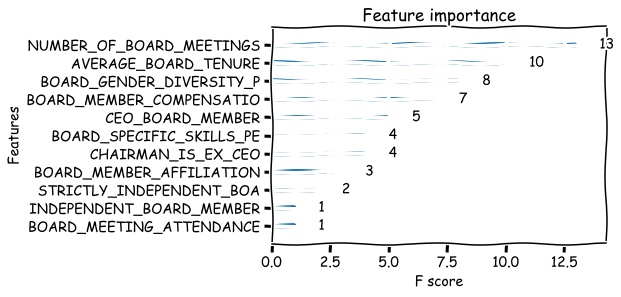

In [78]:
xgboost.plot_importance(bst_model)